# Análise e Determinação da Persona da CT Junior
## Setor de Tecnologia
Abaixo se encontra o código, a explicação, as visualizações a respeito dos dados dos clientes passados da CT Junior, e a interpretação dos dados.

- Primeiro, devemos abrir o arquivo `persona_tec.csv`, que contém todos os dados: 

In [31]:
import csv
import matplotlib.pyplot as plt
import persona as per

with open("persona_tec.csv", "r") as persona_tec:
    csv_reader = csv.reader(persona_tec)
    #-Skip header row
    next(csv_reader)  
    
    gender = list()
    has_company = list()
    company_area = list()
    services = list()
    sources = list()
    social_capital = list()
    avg_price = list()
    
    #-For every client:
    for row in csv_reader:
        client = row[0]
        client = client.split(";")
        #-Now, 'client' is a list of the client data
        #-Gender
        if client[2] == "Masculino":
            gender.append(0)
        elif client[2] == "Feminino":
            gender.append(1)
        #-Has Company
        if (int(client[5]) == 1) or (int(client[5]) == 2):
            has_company.append(True)
        elif int(client[5]) == 0:
            has_company.append(False)
        #-Company Area
        company_area.append(client[7])
        #-Service
        services.append(client[10].split("+"))
        #-Source
        sources.append(client[11])
        #-Social Capital
        social_capital.append(int(client[14]))
        #-Average Price for Client
        avg = int(client[16]) / int(client[15])
        avg_price.append(avg)
    #-Zip the data into tuples
    data = zip(gender, has_company, company_area, services, sources, social_capital, avg_price, strict=True)
    data = list(data)
    for client in data:
        print(client)
        

(0, True, 'Capital_de_Risco', ['Website'], 'Indicacao', 100000, 2200.0)
(0, True, 'Consultoria', ['Website'], 'Ativa', 0, 1500.0)
(0, True, 'Associacao', ['Website'], 'Passiva', 0, 775.0)
(1, True, 'Associacao', ['Website'], 'Passiva', 0, 1600.0)
(1, True, 'Construcao', ['Website'], 'Passiva', 80000, 2400.0)
(0, True, 'Engenharia', ['Website'], 'Passiva', 10000, 1395.0)
(1, True, 'Varejo', ['Website', 'Sistema'], 'Ativa', 29500000, 2500.0)
(0, False, 'NULL', ['Website'], 'Outro', 0, 2500.0)
(0, True, 'ONG', ['Website', 'Prototipo'], 'Facebook', 210000, 2500.0)
(1, True, 'Orgao Sem Fins Lucrativos', ['Sistema'], 'Passiva', 0, 4000.0)
(0, True, 'Comercio', ['Prototipo', 'Sistema'], 'Passiva', 550000, 4750.0)
(0, False, 'NULL', ['Website', 'Landing Page', 'Landing Page', 'Landing Page', 'Landing Page', 'Landing Page'], 'Passiva', 0, 500.0)


Agora, temos em mãos somente os dados necessários, já limpos.
Para o próximo passo, podemos de fato começar a trabalhar com esses dados.

## Análise Descritiva: Medidas de Tendência Central

Vamos calcular algumas medidas para obter a persona.

### Ticket Médio

Calculado por:

$$Ticket Medio = \frac{Faturamento}{N° de Clientes}$$

In [32]:
average_ticket_price = 0.0
for client in data:
    average_ticket_price += client[6]
average_ticket_price /= len(data)
average_ticket_price = round(average_ticket_price, 2)
print(f"O ticket médio de Tecnologia é: R${average_ticket_price}")

O ticket médio de Tecnologia é: R$2218.33


Assim, podemos concluir que o **Ticket Médio** é aprox. `R$2218,00`.

### Mediana do Capital Social

Visto que temos valores extremos, devemos usar a mediana ao invés da média, visto que a mediana é mais resistente contra valores extremos e distribuições distorcidas (*skewed distribution*).

In [33]:
median:float
valid_social_capital = list()
for client in data:
    if client[5] == 0:
        continue
    else:
        valid_social_capital.append(client[5])
median = per.calc_median(valid_social_capital)
median = round(median)
print(f"A mediana do capital social das empresas que contrataram a CT Junior é: {median}.")

A mediana do capital social das empresas que contrataram a CT Junior é: 380000.


Assim, podemos concluir que a mediana do capital social das empresas que contrataram a CT Junior é `R$380.000,00`

## Análise Descritiva: Visualização

Fazendo alguns gráficos, podemos ver melhor a distribuição dos valores e o que eles significam.

### Empresas x Pessoas Físicas

Vamos observar a distribuição de empresas e pessoas físicas que nos contrataram.

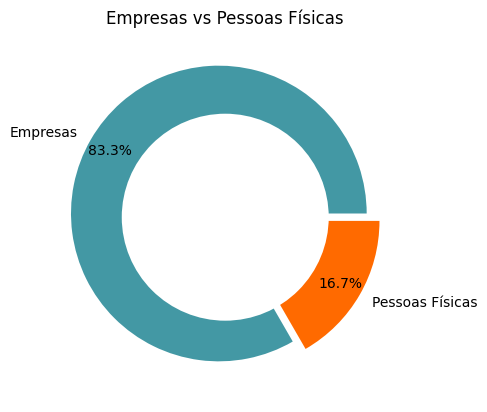

In [34]:
distribution = [0, 0]
label = list()
colors = list()

for client in data:
    if client[1] == True:
        distribution[0] += 1
    elif client[1] == False:
        distribution[1] += 1
    
#-Setting labels for items in Chart
label = ['Empresas','Pessoas Físicas']

#-colors
colors = ['#4398A4', '#FF6A00']

#-explosion
explode = (0.05, 0.05)

#-Pie Chart
plt.pie(distribution, colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85, explode=explode)

#-draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#-Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#-Adding Title of chart
plt.title('Empresas vs Pessoas Físicas')

#-Displaying Chart
plt.show()

Com esse gráfico, podemos concluir que a grande maioria dos nosso clientes de tecnologia são **pessoas jurídicas**, e não pessoas físicas, com uma diferença aproximada de `83%` para empresas e `17%` para pessoas físicas.

### Distribuição dos Serviços

Observe a distribuição dos nossos serviços vendidos.

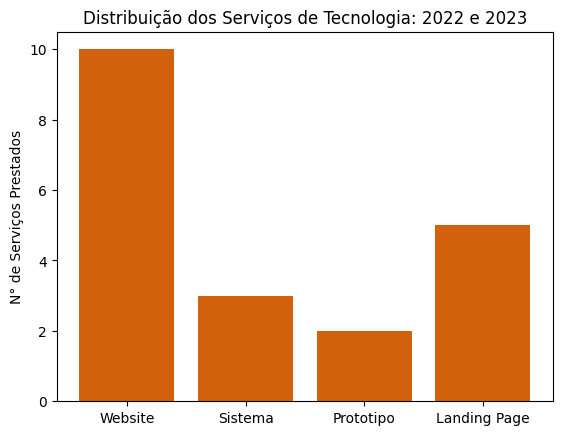

In [36]:
services = dict()
for client in data:
    for service in client[3]:
        if service not in services.keys():
            services[service] = 1
        else:
            services[service] += 1
diff_services = list(services.keys())
service_amount = list(services.values())

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(diff_services)), service_amount, color="#D3600D", width=0.8)

#-Adding chart title
plt.title("Distribuição dos Serviços de Tecnologia: 2022 e 2023")

#-Naming the y-axis
plt.ylabel("N° de Serviços Prestados")

#-Naming the bars accordinly
plt.xticks(range(len(diff_services)), diff_services)

#-Displaying chart
plt.show()

Esse gráfico nos permite ver que o serviço mais requisitado é o Website. 

- Observação:

Dos protótipos no gráfico, um é um **protótipo de sistema** e o outro é um **protótipo de aplicativo**.            